1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

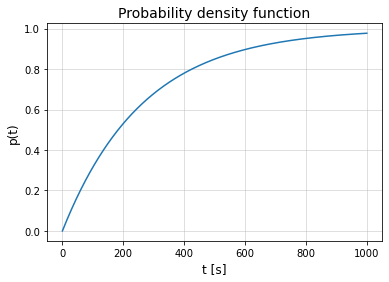

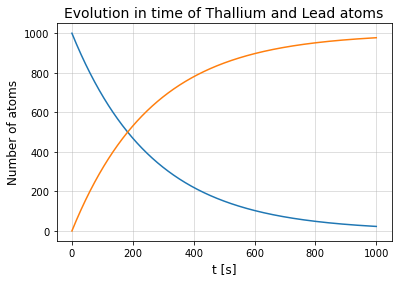

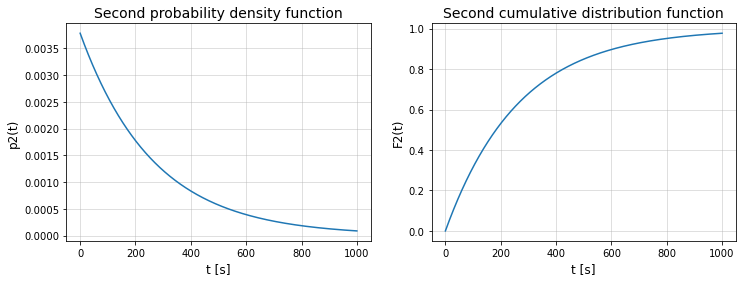

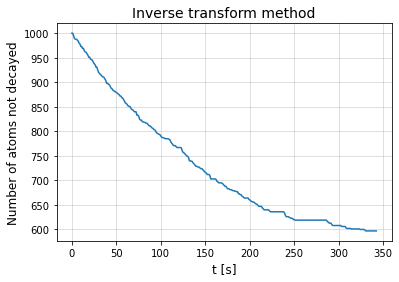

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

tau = 3.052*60        # Conversion from minutes to seconds.
thallium_atoms = 1000 # Initial number of samples for Thallium atoms.
lead_atoms = 0        # Initial number of samples for Lead atoms.

# Definition of the probability density function.
def pdf(t,tau):
    p = 1 - 2**(-t/tau)
    return p

# Definition of the cumulative distribution function.
def cdf(t,tau):
    F = t + (2**(-t/tau)-1)*(tau/math.log(2))
    return F


# Time vector with step=1.
t = np.linspace(0,thallium_atoms,thallium_atoms)

# PDF.
p = pdf(t,tau)
# Plot of the probability density function.
plt.figure(figsize=(6,4))
plt.plot(t,p)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('p(t)',size=12)
plt.title('Probability density function',size=14)
plt.show()

# Evolution of the number of Thallium atoms in time.
thallium_time = np.zeros(thallium_atoms)

# Evolution of the number of Thallium atoms in time.
lead_time = np.zeros(thallium_atoms)

# At each time-step decide whether each TI atom has decayed or not, accordingly to the pdf.
for i in range(thallium_atoms):
    thallium_time[i] = thallium_atoms-p[i]*thallium_atoms
    lead_time[i] = p[i]*thallium_atoms
# Plot the evolution in time of Thallium and Lead atoms.
plt.figure(figsize=(6,4))
plt.plot(t,thallium_time)
plt.plot(t,lead_time)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('Number of atoms',size=12)
plt.title('Evolution in time of Thallium and Lead atoms',size=14)
plt.show()

# Definition of the probability density function.
def pdf2(t,tau):
    p = 2**(-t/tau)*(math.log(2)/tau)
    return p
# Definition of the cumulative distribution function.
def cdf2(t,tau):
    F = 1 - 2**(-t/tau)
    return F

# Definition of the inverse cumulative distribution function.
def inv_cdf2(y,tau):
    t = np.zeros(len(y))
    for i in range(len(y)):
        t[i] = -tau*math.log((1-y[i]),2)
    return t

# PDF.
p2 = pdf2(t,tau)

# CDF.
F2 = cdf2(t,tau)

# Plot of the probability density function.
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t,p2)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('p2(t)',size=12)
plt.title('Second probability density function',size=14)

# Plot of the cumulative distribution function.
plt.subplot(122)
plt.plot(t,F2)
plt.grid(alpha=0.5)
plt.xlabel('t [s]',size=12)
plt.ylabel('F2(t)',size=12)
plt.title('Second cumulative distribution function',size=14)
plt.show()
u = np.random.random(1000)           # Generation of 1000 random numbers.
instants = inv_cdf2(u,tau)           # Apply the inverse of the CDF.
instants = np.sort(instants)         # Sort the time instants.
samples = np.linspace(0,1000,1000)   # Discrete time.
counts = np.zeros(1000)              # Counts in any interval.
count_index = 0

for i in range(1000):
    if instants[i] < samples[count_index]:     # If instants occur in the range [i-1;i] the number of counts
        counts[count_index] += 1               # in the correspondent interval increases.
    else:
        count_index += 1

total_count = np.sum(counts)
k = 0
decayed_per_time = []
while(np.sum(counts[:k])<total_count):
    decayed_per_time.append(np.sum(counts[:k]))
    k += 1
decayed_per_time = np.asarray(decayed_per_time) # At each instant it stores the number of decayed atoms.
not_decayed = (1000-decayed_per_time)           # At each instant it stores the number of not decayed atoms.

plt.figure(figsize=(6,4))
plt.plot(samples[:k],not_decayed)
plt.xlabel('t [s]',size=12)
plt.ylabel('Number of atoms not decayed',size=12)
plt.title('Inverse transform method',size=14)
plt.grid(alpha=0.5)
plt.show()    

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Number of iterations: 10

HIT/MISS METHOD:
Integral mean value =  1.34688 
Standard deviation =  0.008962231864887177

MEAN VALUE METHOD:
Integral mean value =  1.3463995853704176 
Standard deviation =  2.220446049250313e-16


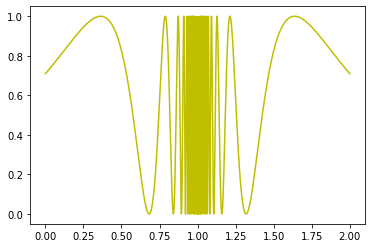

In [4]:
def f(x):
    return (np.sin(1/(1-x)))**2

N = 10 #number of iteration
print("Number of iterations:", N)
n = 10000
x=np.linspace(0.001, 1.999, n)
plt.plot(x, f(x), 'y-')

#HIT/MISS METHOD
integr_hm = []
for j in range(N):
    count = 0
    for i in range(n):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / n
    integr_hm.append(I)

mu_hm = np.sum(integr_hm)/len(integr_hm) #mean value
quadr = []
for k in range(N):
    quadr.append((integr_hm[k] - mu_hm)**2)
stdev_hm = np.sqrt(np.sum(quadr)/N)
print("\nHIT/MISS METHOD:\nIntegral mean value = ", mu_hm, "\nStandard deviation = ", stdev_hm)
#MEAN VALUE METHOD
n = 10000
x=np.linspace(0.001, 1.999, n)
integr_mv = []
for j in range(N):
    I_mean = (2/n)*np.sum(f(x))
    integr_mv.append(I_mean)
    
mu_mv = np.sum(integr_mv)/len(integr_mv) #mean value
quadr_mv = []
for k in range(N):
    quadr_mv.append((integr_mv[k] - mu_mv)**2)
stdev_mv = np.sqrt(np.sum(quadr_mv)/N)
print("\nMEAN VALUE METHOD:\nIntegral mean value = ", mu_mv, "\nStandard deviation = ", stdev_mv)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
def f(x, y):
    return x**2 + y**2

n = 1000
x = np.linspace(-1,1,n)
y = np.linspace(-1,1,n)

#estimate the integral with mean value method
I = (2/n)*np.sum(f(x, y))
print("The area of the 2-dim circle is:", I)

#in 10D:
def f10(z):
    return np.sum(z**2)
z = np.array([x for i in range(10)])

I_10 = (2/n)*np.sum(f10(z))
print("The area of a 10-dim sphere is:", I_10)

The area of the 2-dim circle is: 1.3360026693360028
The area of a 10-dim sphere is: 6.6800133466800125


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [6]:
def f(x):
    return np.power(x, -1/2)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

#estimation of the integral of w(x) between 0 and 1: 2*radq(x)
intW = 2

N = 1000
x = np.linspace(0.0001,1,N)

I = (1.0/N)*np.sum(f(x)/w(x))*intW
print("The integral obtained with the importance sampling method is:", I)

The integral obtained with the importance sampling method is: 0.7597561416438907
